# Overfitting on the IMDB movie reviews dataset

In this notebook we shall focus on overfitting, demonstrating the phenomenon and studying techniques to address it. The dataset we shall use is the IMDB movie reviews dataset, composed of 25,000 movies reviews, labeled by sentiment (positive/negative).

To prevent overfitting, the best solution is to use more training data. When that is not a
viable possibility, you can try to use regularization techniques, constraining the quantity and quality of information stored by the model. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent ones, which have a better chance of generalizing well.



In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

Let us load the dataset. In keras, the dataset is preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

In [2]:
num_words = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let us a look at the encoding of the first review.

In [3]:
sample = x_train[320]
print(len(sample))

208


This representation has a variable length dimension, that is not very stuitable for a neural network.

Let us transform it into a multi_hot encoding of of dimension equal to num_words. In this representation, a word gets index 1 if it appears in the document. It is essentially a bag-of-words encoding.

In [4]:
def multi_hot_sequences(sequences, dimension):
  multi_hot = np.zeros((len(sequences),dimension))
  for i in range(0,len(sequences)):
    multi_hot[i, sequences[i]] = 1
  return multi_hot

x_train = multi_hot_sequences(x_train, num_words)
x_test = multi_hot_sequences(x_test, num_words)

Let us have a look at the initial part of the encoding for the first review.

In [5]:
print(x_train[0,0:30])
print(x_train[0].shape)

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0.]
(500,)


We now define our first model, that is just a concatenation of three dense layers.

In [6]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu')(seq)
x = Dense(16, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

base_model = Model(seq, x)

In [7]:
base_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,121 (129.38 KB)

 Trainable params: 33,121 (129.38 KB)

 Non-trainable params: 0 (0.00 B)

We compile the model using adam as optimizer, and binary crossentropy (log likelyhood) as loss function. The fit function returns a history of the training, that can be later inspected. In addition to the loss function, that is the canonical metric used for training, we also ask the model to keep trace of accuracy.

In [8]:
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
base_history = base_model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 1
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6701 - loss: 0.6058 - val_accuracy: 0.8106 - val_loss: 0.4237
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8266 - loss: 0.3957 - val_accuracy: 0.8293 - val_loss: 0.3894
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8408 - loss: 0.3703 - val_accuracy: 0.8314 - val_loss: 0.3851
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8418 - loss: 0.3643 - val_accuracy: 0.8307 - val_loss: 0.3843
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8433 - loss: 0.3559 - val_accuracy: 0.8322 - val_loss: 0.3819
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8513 - loss: 0.3415 - val_accuracy: 0.8321 - val_loss: 0.3821
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8566 - loss: 0.3310 - val_accuracy: 0.8311 - val_loss: 0.3841
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8632 - loss: 0.3229 - val_accuracy: 0.8298 - val

Let us see the keys available in our history.

In [10]:
print(base_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


The following function allows us to plot the results.

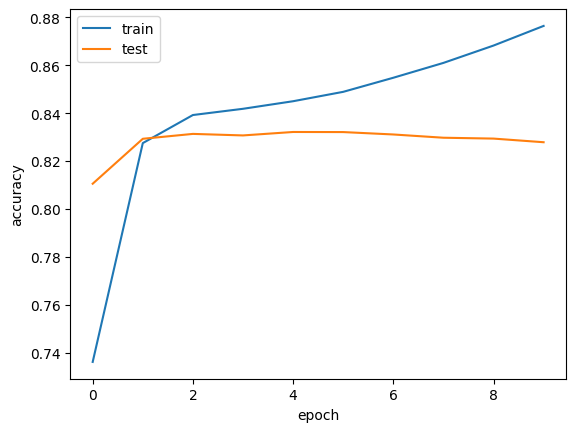

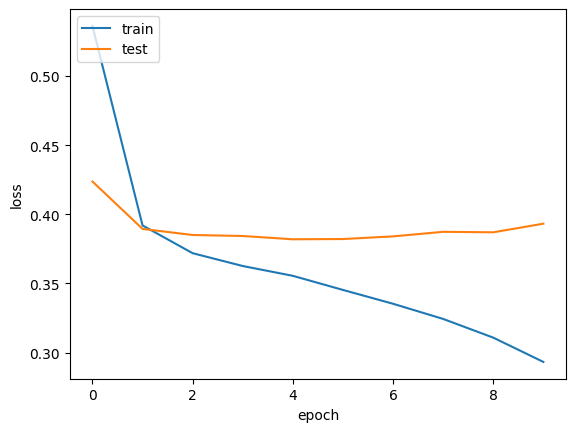

In [11]:
def plot_history(model_history,keys):
    m,val_m = keys
    plt.plot(model_history.history[m])
    plt.plot(model_history.history[val_m])
    plt.ylabel(m)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(base_history,['accuracy','val_accuracy'])
plot_history(base_history,['loss','val_loss'])


# Weight regularization

In [12]:
from keras import regularizers

seq = Input(shape=(num_words,))
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(seq)
x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.005))(x)
x = Dense(1, activation='sigmoid')(x)

l2reg_model = Model(seq, x)

In [13]:
l2reg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
l2reg_history = l2reg_model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 2
)

Epoch 1/10
49/49 - 2s - 47ms/step - accuracy: 0.7069 - loss: 1.0600 - val_accuracy: 0.8011 - val_loss: 0.7709
Epoch 2/10
49/49 - 1s - 12ms/step - accuracy: 0.8224 - loss: 0.6506 - val_accuracy: 0.8279 - val_loss: 0.5766
Epoch 3/10
49/49 - 1s - 13ms/step - accuracy: 0.8317 - loss: 0.5391 - val_accuracy: 0.8303 - val_loss: 0.5163
Epoch 4/10
49/49 - 1s - 29ms/step - accuracy: 0.8341 - loss: 0.4941 - val_accuracy: 0.8272 - val_loss: 0.4942
Epoch 5/10
49/49 - 1s - 22ms/step - accuracy: 0.8321 - loss: 0.4764 - val_accuracy: 0.8319 - val_loss: 0.4701
Epoch 6/10
49/49 - 1s - 12ms/step - accuracy: 0.8352 - loss: 0.4575 - val_accuracy: 0.8229 - val_loss: 0.4747
Epoch 7/10
49/49 - 1s - 13ms/step - accuracy: 0.8330 - loss: 0.4516 - val_accuracy: 0.8323 - val_loss: 0.4521
Epoch 8/10
49/49 - 0s - 10ms/step - accuracy: 0.8364 - loss: 0.4414 - val_accuracy: 0.8306 - val_loss: 0.4477
Epoch 9/10
49/49 - 1s - 12ms/step - accuracy: 0.8341 - loss: 0.4362 - val_accuracy: 0.8313 - val_loss: 0.4423
Epoch 10/1

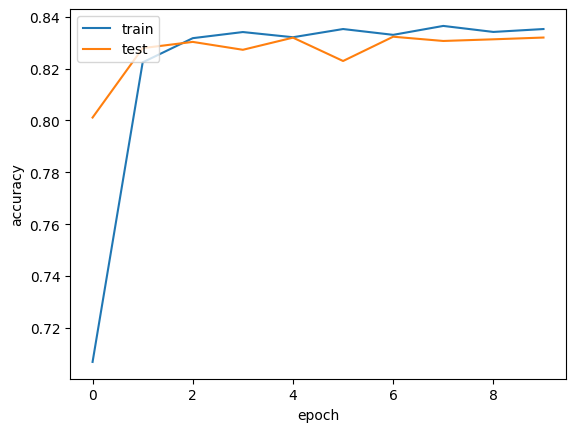

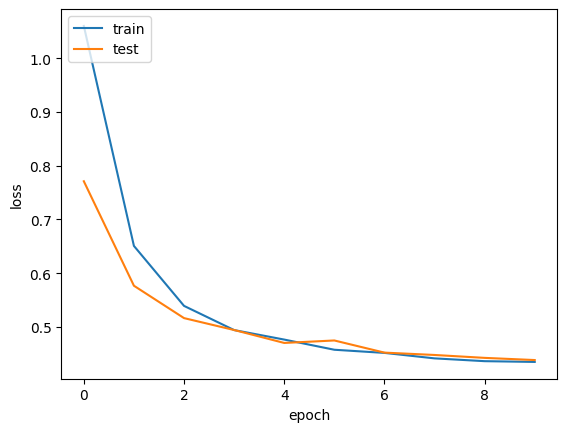

In [15]:
plot_history(l2reg_history,['accuracy','val_accuracy'])
plot_history(l2reg_history,['loss','val_loss'])

# Dropout

Dropout is an alternativeregularization techniques for neural networks. It consists of randomly “dropping out” (i.e. set to zero) a number of output features of the layer during training.

At test time, no units are dropped out, but the layer’s output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [16]:
from keras.layers import Dropout
from keras import optimizers

Let’s add a couple of dropout layers in our IMDB network and see how it performs.


In [17]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu')(seq)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

dropout_model = Model(seq, x)

In [18]:
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
dropout_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,121 (129.38 KB)

 Trainable params: 33,121 (129.38 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
dropout_history = dropout_model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 1
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5408 - loss: 0.7149 - val_accuracy: 0.7530 - val_loss: 0.5928
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6853 - loss: 0.5938 - val_accuracy: 0.8057 - val_loss: 0.4606
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7650 - loss: 0.5002 - val_accuracy: 0.8204 - val_loss: 0.4137
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7928 - loss: 0.4617 - val_accuracy: 0.8249 - val_loss: 0.3956
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8074 - loss: 0.4327 - val_accuracy: 0.8287 - val_loss: 0.3851
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8250 - loss: 0.4063 - val_accuracy: 0.8279 - val_loss: 0.3796
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8313 - loss: 0.3983 - val_accuracy: 0.8302 - val_loss: 0.3766
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8337 - loss: 0.3941 - val_accuracy: 0.8310 - v

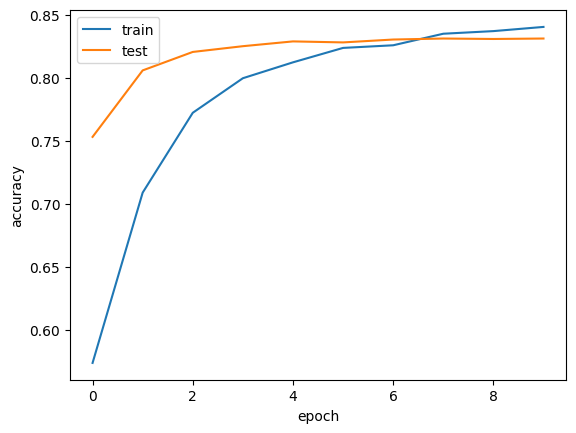

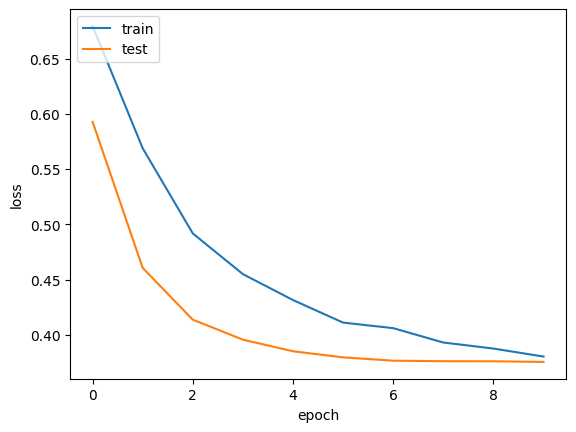

In [22]:
plot_history(dropout_history,['accuracy','val_accuracy'])
plot_history(dropout_history,['loss','val_loss'])

In [23]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(seq)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

mixed_model = Model(seq, x)

In [27]:
adam = optimizers.Adam(learning_rate=0.001)
mixed_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
mixed_history = mixed_model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 2
)

Epoch 1/5
49/49 - 3s - 55ms/step - accuracy: 0.5630 - loss: 1.2126 - val_accuracy: 0.7510 - val_loss: 0.9655
Epoch 2/5
49/49 - 1s - 19ms/step - accuracy: 0.7094 - loss: 0.8506 - val_accuracy: 0.8094 - val_loss: 0.6688
Epoch 3/5
49/49 - 1s - 14ms/step - accuracy: 0.7830 - loss: 0.6603 - val_accuracy: 0.8270 - val_loss: 0.5582
Epoch 4/5
49/49 - 1s - 30ms/step - accuracy: 0.8059 - loss: 0.5743 - val_accuracy: 0.8289 - val_loss: 0.5070
Epoch 5/5
49/49 - 1s - 21ms/step - accuracy: 0.8206 - loss: 0.5270 - val_accuracy: 0.8297 - val_loss: 0.4810


# Early stopping

Early stopping is a method that allows you to stop training as soon as the model performance stops improving on the validation dataset.

This requires that a validation set must be provided to the fit() function.

Early stopping can be simply implemented in keras using callbacks.
A callback is a function taht is called at specific stages of the training procedure: start/end of epochs, start end of minibatches, etc.

You can use callbacks to get a view on internal states and statistics of the model during training. A list of callbacks can be passed to the .fit() function using the keyword argument "callbacks".

In [30]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

saveDir = os.path.join(os.getcwd(), 'saved_models/')
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

es_cb = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
chkpt = saveDir + 'imdb.h5'

cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [31]:
mixed_model.fit(x_train, y_train,
                batch_size=512, #batch_size,
                epochs= 50,
                verbose=1,
                validation_data=(x_test,y_test),
                callbacks=[es_cb, cp_cb],
                shuffle=True)

Epoch 1/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8250 - loss: 0.5069
Epoch 1: val_loss improved from inf to 0.46966, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8249 - loss: 0.5066 - val_accuracy: 0.8308 - val_loss: 0.4697
Epoch 2/50
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8302 - loss: 0.4847
Epoch 2: val_loss improved from 0.46966 to 0.45602, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8300 - loss: 0.4846 - val_accuracy: 0.8310 - val_loss: 0.4560
Epoch 3/50
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8226 - loss: 0.4836
Epoch 3: val_loss improved from 0.45602 to 0.44677, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8230 - loss: 0.4830 - val_accuracy: 0.8323 - val_loss: 0.4468
Epoch 4/50
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8279 - loss: 0.4745
Epoch 4: val_loss improved from 0.44677 to 0.44578, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8279 - loss: 0.4744 - val_accuracy: 0.8318 - val_loss: 0.4458
Epoch 5/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8361 - loss: 0.4573
Epoch 5: val_loss improved from 0.44578 to 0.44323, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8356 - loss: 0.4578 - val_accuracy: 0.8299 - val_loss: 0.4432
Epoch 6/50
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8330 - loss: 0.4585
Epoch 6: val_loss improved from 0.44323 to 0.43804, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8329 - loss: 0.4584 - val_accuracy: 0.8319 - val_loss: 0.4380
Epoch 7/50
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8327 - loss: 0.4544
Epoch 7: val_loss did not improve from 0.43804
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8326 - loss: 0.4545 - val_accuracy: 0.8286 - val_loss: 0.4397
Epoch 8/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8340 - loss: 0.4439
Epoch 8: val_loss improved from 0.43804 to 0.43404, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8337 - loss: 0.4445 - val_accuracy: 0.8318 - val_loss: 0.4340
Epoch 9/50
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.4516
Epoch 9: val_loss did not improve from 0.43404
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8310 - loss: 0.4516 - val_accuracy: 0.8325 - val_loss: 0.4349
Epoch 10/50
45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8337 - loss: 0.4407
Epoch 10: val_loss improved from 0.43404 to 0.43280, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8336 - loss: 0.4415 - val_accuracy: 0.8311 - val_loss: 0.4328
Epoch 11/50
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8346 - loss: 0.4452
Epoch 11: val_loss did not improve from 0.43280
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8341 - loss: 0.4454 - val_accuracy: 0.8288 - val_loss: 0.4364
Epoch 12/50
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8358 - loss: 0.4421
Epoch 12: val_loss improved from 0.43280 to 0.43036, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8356 - loss: 0.4423 - val_accuracy: 0.8323 - val_loss: 0.4304
Epoch 13/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8313 - loss: 0.4468
Epoch 13: val_loss improved from 0.43036 to 0.43026, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8315 - loss: 0.4466 - val_accuracy: 0.8332 - val_loss: 0.4303
Epoch 14/50
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8384 - loss: 0.4314
Epoch 14: val_loss did not improve from 0.43026
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8382 - loss: 0.4320 - val_accuracy: 0.8332 - val_loss: 0.4333
Epoch 15/50
44/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8361 - loss: 0.4383
Epoch 15: val_loss improved from 0.43026 to 0.42978, saving model to /content/saved_models/imdb.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8360 - loss: 0.4387 - val_accuracy: 0.8335 - val_loss: 0.4298
Epoch 16/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8392 - loss: 0.4346
Epoch 16: val_loss did not improve from 0.42978
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8391 - loss: 0.4347 - val_accuracy: 0.8334 - val_loss: 0.4299
Epoch 17/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8413 - loss: 0.4318
Epoch 17: val_loss did not improve from 0.42978
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8409 - loss: 0.4326 - val_accuracy: 0.8322 - val_loss: 0.4316
Epoch 18/50
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8355 - loss: 0.4410
Epoch 18: val_loss did not improve from 0.42978
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8353 - loss: 0.4408 - val_accuracy: 0.8248 - val_loss: 0.4422
Epoch 18: early stopping


In [32]:
loss,acc = mixed_model.evaluate(x_test,y_test)
print("test loss = ", loss)
print("test accuracy = ", acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8227 - loss: 0.4445
test loss =  0.4422127604484558
test accuracy =  0.8248000144958496
